# 18BCE101

## BDA prac 2

**AIM:**

Learning limitation of data analytics by applying Machine Learning Techniques on large amount of data. Write a  program to read data set from any online website, excel file and CSV file and to perform 

a)   Linear regression and logistic regression on iris dataset.        
b)   K-means clustering.

Importing libraries

In [13]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans

Loading the data

In [2]:
data = pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Peforming linear regression

Rows : 150, column : 6
Theta : [[1.76405235 0.40015721 0.97873798 2.2408932  1.86755799]]


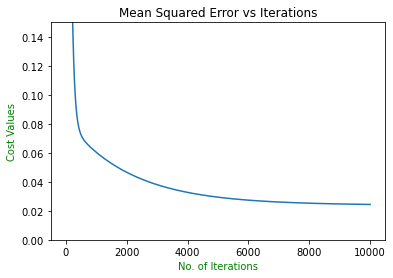

The model predicted values of Iris dataset with an overall accuracy of 96.0


In [12]:
rows, col = data.shape
print("Rows : %s, column : %s" % (rows, col))

mapping = {
    'Iris-setosa' : 1,
    'Iris-versicolor' : 2,
    'Iris-virginica' : 3
}

# Input Feature Values
X = data.drop(['Id', 'Species'], axis=1).values 
# Output values
y = data.Species.replace(mapping).values.reshape(rows,1) 

# Adding one more column for bias
X = np.hstack(((np.ones((rows,1))), X))

np.random.seed(0)
theta = np.random.randn(1,5) 
print("Theta : %s" % (theta))

iteration = 10000
learning_rate = 0.003 
J = np.zeros(iteration)

# Let's train our model to compute values of theta
for i in range(iteration):
    J[i] = (1/(2 * rows) * np.sum((np.dot(X, theta.T) - y) ** 2 ))
    theta -= ((learning_rate/rows) * np.dot((np.dot(X, theta.T) - y).reshape(1,rows), X))

prediction = np.round(np.dot(X, theta.T))

ax = plt.subplot(111)
ax.plot(np.arange(iteration), J)
ax.set_ylim([0,0.15])
plt.ylabel("Cost Values", color="Green")
plt.xlabel("No. of Iterations", color="Green")
plt.title("Mean Squared Error vs Iterations")
plt.show()

accuracy = (sum(prediction == y)/float(len(y)) * 100)[0]
print("The model predicted values of Iris dataset with an overall accuracy of %s" % (accuracy))

Performing Kmeans

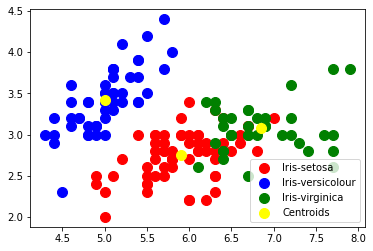

In [14]:
x = data.iloc[:, [1, 2, 3, 4]].values

kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

Big Data Loading